In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import datetime
import time
import matplotlib
import base
import predict


import matplotlib
myfont = matplotlib.font_manager.FontProperties(fname=r'C:/Windows/Fonts/msyh.ttf')
matplotlib.use('qt4agg')  
#指定默认字体  
matplotlib.rcParams['font.sans-serif'] = ['SimHei']   
matplotlib.rcParams['font.family']='sans-serif'  
#解决负号'-'显示为方块的问题  
matplotlib.rcParams['axes.unicode_minus'] = False   

%load_ext autoreload
%autoreload 2

C:\Program Files\Anaconda3\lib\site-packages\matplotlib\__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [4]:
#读取user_pay_count
user_pay_counts = base.ReadUserPayCountCSV();
#读取开店时间数据
shop_open_dates = base.ReadShopOpenDateCSV();
###读取商家信息
shop_infos = base.ReadShopInfoCSV();
##读取城市名称对照表
city_names = base.ReadCityNameCSV();
#读取休假表
calenders = base.ReadCalendarCSV();

In [5]:
%reload_ext autoreload

In [6]:
def plotHolidayWeatherPayCounts(shop_id, day_type, start_time, end_time):
    holiday_mean_df = base.getHolidayPayCount(
        shop_id, day_type, shop_open_dates, user_pay_counts, calenders, start_time, end_time)
    
    info = shop_infos.ix[shop_id]
    weathers = base.readWeatherData(city_names.loc[info['city']])
    print(info)
    holiday_mean_df['weather'] = weathers.loc[holiday_mean_df.index]['desc'].values
    print(holiday_mean_df)
    holiday_mean_df = holiday_mean_df.reset_index(drop=True)
    
    f, (ax) = plt.subplots(1, 1, figsize=(10, 5))
    ax.plot(holiday_mean_df.index, holiday_mean_df['count'])
    
    temp = holiday_mean_df[holiday_mean_df['weather'] == '1']
    ax.scatter(temp.index, temp['count'], color='r', s=60, label="perfect")
    temp = holiday_mean_df[holiday_mean_df['weather'] == '2']
    ax.scatter(temp.index, temp['count'], color='g', s=60, label="good")
    temp = holiday_mean_df[holiday_mean_df['weather'] == '3']
    ax.scatter(temp.index, temp['count'], color='b', s=60, label="medium")
    temp = holiday_mean_df[holiday_mean_df['weather'] == '4']
    ax.scatter(temp.index, temp['count'], color='y', s=60, label="not bad")
    temp = holiday_mean_df[holiday_mean_df['weather'] == '5']
    ax.scatter(temp.index, temp['count'], color='k', s=60, label="bad")

    plt.title(info.cate_1_name + ' ' + info.cate_2_name + ('' if info.cate_3_name is None else info.cate_3_name), fontproperties=myfont)
    mean_value = np.mean(holiday_mean_df['count'])
    print('mean_value=' + str(mean_value))
    ax.axhline(y=mean_value, linewidth=1, color='r')
    plt.legend()
    plt.show()

In [11]:
def plotHolidayTemperatureCounts(shop_id, day_type, start_time, end_time):
    holiday_mean_df = base.getHolidayPayCount(
        shop_id, day_type, shop_open_dates, user_pay_counts, calenders, start_time, end_time)
    
    info = shop_infos.ix[shop_id]
    weathers = base.readWeatherData(city_names.loc[info['city']])
    print(info)
    holiday_mean_df['t_max'] = weathers.loc[holiday_mean_df.index]['max'].values
    holiday_mean_df['t_min'] = weathers.loc[holiday_mean_df.index]['min'].values
    holiday_mean_df = holiday_mean_df.reset_index(drop=True)
    
    f, (ax) = plt.subplots(1, 1, figsize=(10, 5))
    ax.plot(holiday_mean_df.index, holiday_mean_df['count'], color='k', label='count');
    ax.plot(holiday_mean_df.index, holiday_mean_df['t_max'] * 5, color='r', label='max');
    ax.plot(holiday_mean_df.index, holiday_mean_df['t_min'] * 5, color='b', label='min');
    
    plt.title(info.cate_1_name + ' ' + info.cate_2_name + ('' if info.cate_3_name is None else info.cate_3_name), fontproperties=myfont)
    mean_value = np.mean(holiday_mean_df['count'])
    print('mean_value=' + str(mean_value))
    ax.axhline(y=mean_value, linewidth=1, color='r')
    plt.legend()
    plt.show()

city             镇江
loc             438
per_pay          13
score             3
comment_cnt       4
shop_level        2
cate_1_name      美食
cate_2_name      快餐
cate_3_name    西式快餐
Name: 576, dtype: object
            count  holiday weather
2016-04-05     52        1       4
2016-04-06     52        1       4
2016-04-07     56        1       1
2016-04-11     65        1       1
2016-04-12     51        1       1
2016-04-13     49        1       1
2016-04-14     57        1       1
2016-04-18     50        1       1
2016-04-19     42        1       5
2016-04-20     52        1       4
2016-04-21     60        1       1
2016-04-25     50        1       1
2016-04-26     53        1       4
2016-04-27     53        1       1
2016-04-28     69        1       1
2016-05-03     59        1       1
2016-05-04     66        1       1
2016-05-05     52        1       4
2016-05-09     50        1       3
2016-05-10     56        1       1
2016-05-11     63        1       1
2016-05-12     55        

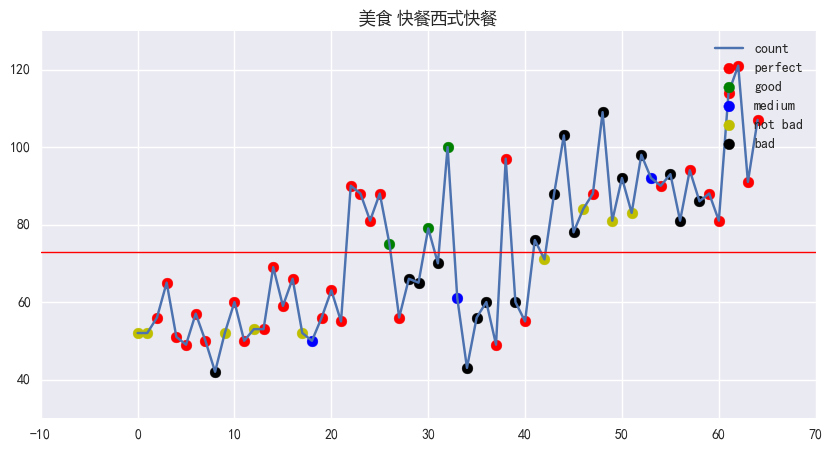

In [19]:
id = 576
day_type = 1
plotHolidayWeatherPayCounts(id, day_type, pd.to_datetime('2016-4-1'), pd.to_datetime('2016-7-31'))

city             镇江
loc             438
per_pay          13
score             3
comment_cnt       4
shop_level        2
cate_1_name      美食
cate_2_name      快餐
cate_3_name    西式快餐
Name: 576, dtype: object
mean_value=53.901408450704224


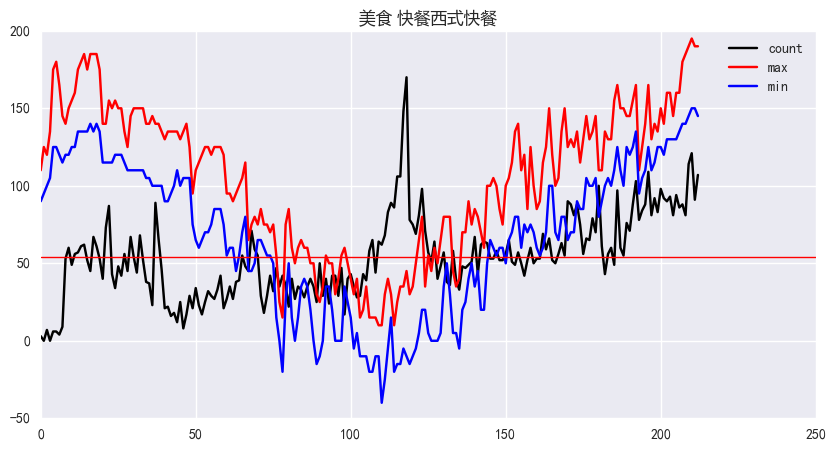

In [17]:
id = 576
day_type = 1
plotHolidayTemperatureCounts(id, day_type, pd.to_datetime('2015-7-1'), pd.to_datetime('2016-7-31'))